# Correlation and Regression

Scatter plots are intuitive graphics that allow us to tell, at a distance and with reasonable certainty, whether a relationship exists between two numeric variables.

## Illustration

For example, say we wish to know if *Anxiety* and *Optimism* are linearly related. Let's do the following steps to setup the scatter plot and to prepare for linear regression, as needed.

1. Create the linear model and save it to the variable **mod**.
2. Plot the model which produces a scatter plot.
3. Add the line of best fit to the scatter plot.

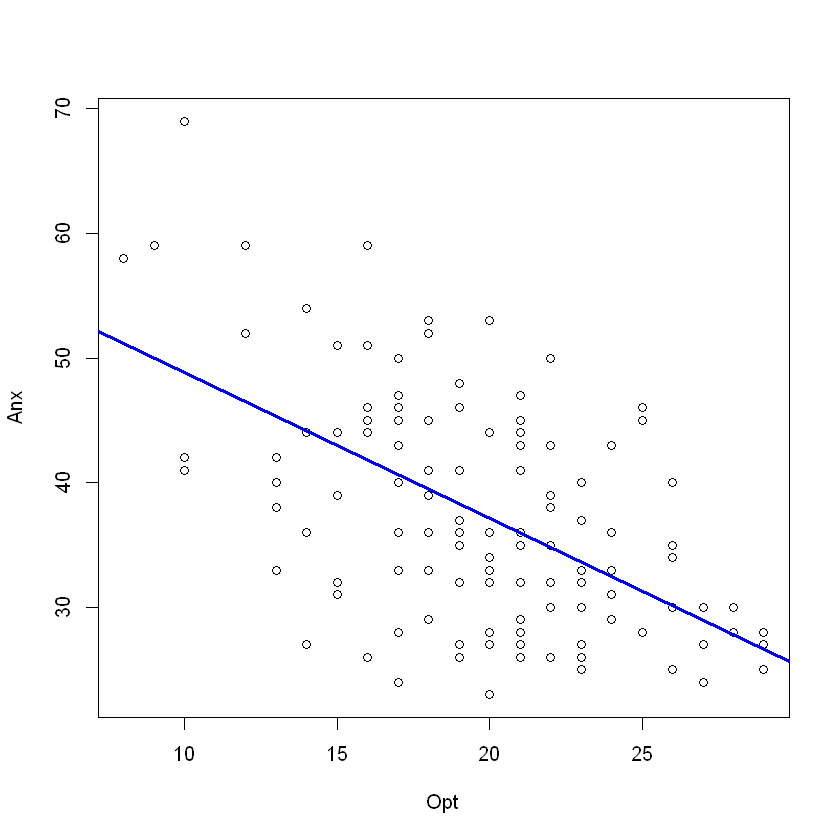

In [2]:
# Load data. Create model.
pers <- read.csv('https://faculty.ung.edu/rsinn/data/personality.csv')
mod <- lm(Anx ~ Opt, data = pers)

# Produce scatter plot with line of best of fit.
plot(Anx ~ Opt, data = pers)
abline(mod, lwd = 3, col = 'blue')

As we suggested, we can now tell at a glance that there is a negative, linear association between the variables. We know this by assessing the line of best fit which, if there were no linear association, would have a slope of approximately zero.

**How strong is the correlation?** Not very. The cloud of points is somewhat diffuse, so we don't expect a strong correlation. Instead, we expect a weak-to-moderate negative correlation if the correlation is significant. The table below shows, once we know the correlation coefficient $r$, how we analyze the strength of correlation. Recall that correlation, being a cosine, varies between $-1$ and $+1$, which is why we will the absolute value.

<table style="width:50%">
  <tr>
    <th>Correlation Value</th>
    <th style="text-align: center;">Strength of Correlation</th>
  </tr>
  <tr>
    <td style="text-align: center;">$|r| < 0.25$</td>
    <td style="text-align: center;">Little or No Correlation</td>
  </tr>
  <tr>
    <td style="text-align: center;">$0.25 < |r| < 0.50$</td>
    <td style="text-align: center;">Weak Correlation</td>
  </tr>
  <tr>
    <td style="text-align: center;">$0.50 < |r| < 0.75$</td>
    <td style="text-align: center;">Moderate Correlation</td>
  </tr>
  <tr>
    <td style="text-align: center;">$|r| > 0.75$</td>
    <td style="text-align: center;">Strong Correlation</td>
  </tr>
</table>

**Assumptions for Linear Regression**

We have the following requirements:

1. **Linearity:** the scatter plot shows a roughly linear relationship between the variables.
2. **Normality:** a plot of the residuals should be approximately normal.

Some texts will add **homoscedasticity** of the residuals, as well. We will focus on the first two above.

## Example 1: Anxiety vs. Optimism

Given the scatter plot shown above and the linear model we created, run a linear regression test for the significance of the correlation.

### Hypotheses

For regression, we are using the sample statistic $r$ to estimate the population parameter $\rho$. Hence, our hypothesis can be written as follows:

$$\begin{align}H_0 : \rho &= 0\\H_0 : \rho &\neq 0\end{align}$$

Due to the close nature of the relationship between slope and correlation, e.g.

$$\beta = r\frac{s_y}{s_x}$$

we may also write the hypothesis as follows:

$$\begin{align}H_0 : \beta &= 0\\H_0 : \beta &\neq 0\end{align}$$

Regardless of which of these two formulations for the hypotheses we use, the same procedure is run and the same values are obtained. To understand what "rejecting the null hypothesis" will mean in practice, consider the following:

$$\begin{align}H_0 : \rho &= 0\hspace{3mm}\text{(no correlation)}\\H_0 : \rho &\neq 0\hspace{3mm}\text{(significant correlation)}\end{align}$$

### Normality of Residuals

We can get a vector of the residuals by using the linear model we created:

$$\textbf{mod\$residuals}$$

Let's use this vector to create a **QQ Plot** and a **Density Plot**.

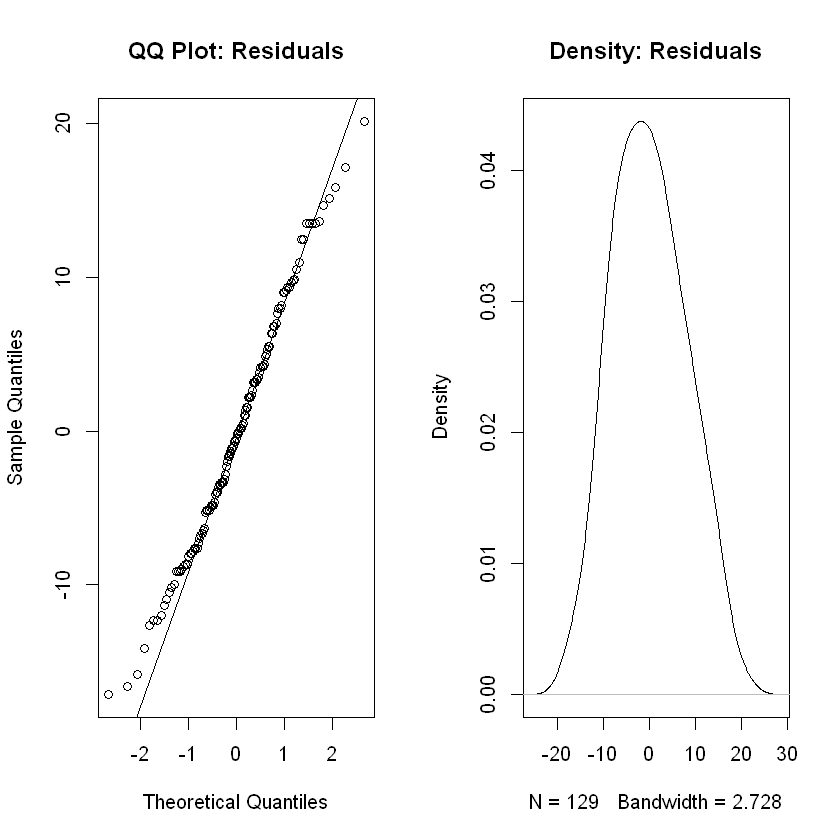

In [8]:
layout(matrix(c(1,2), ncol = 2), lcm(9))
plt <- { qqnorm(mod$residuals, main = 'QQ Plot: Residuals') ; qqline(mod$residuals) }
plot(density(mod$residuals), main = 'Density: Residuals')

**Analysis.** We have a "heavy tails" issue in the QQ Plot, yet the shape is close enough to linear for our purposes. The Density Plot shows a very normal distribution of the residuals. Thus, from the scatter plot to these two plots, we see that the linearity and normality assumptions are met. These data are appropriate for linear regression techniques.

### Running the Regression

We will add a **cat()** function above the regression to calculate and show the bivariate correlation. This is often helpful as the correlation coefficient value can be quite difficult to determine from the regression output.

In [12]:
cat('r =', cor(pers$Opt,pers$Anx))
mod <- lm(Opt ~ Anx, data = pers)
summary(mod)

r = -0.5432437


Call:
lm(formula = Opt ~ Anx, data = pers)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8368 -2.1126 -0.1011  2.6575  7.4275 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.20431    1.34064  21.784  < 2e-16 ***
Anx         -0.25287    0.03468  -7.292  2.9e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.744 on 127 degrees of freedom
Multiple R-squared:  0.2951,	Adjusted R-squared:  0.2896 
F-statistic: 53.17 on 1 and 127 DF,  p-value: 2.898e-11


### Reporting Out

Given that $p = 2.9\times 10^{-11} < 0.05 = \alpha$, we reject the null. Thus, we have evidence of a significant correlation (r = -0.5432) which is moderate and negative.

#### Coefficient of Determination

The variance accounted for in the dependent variable by the model is given by $R^2$. That analysis and reporting out is shown below:

Since $R^2 = 0.295$, we see that 29.5% of the variance in Anxiety score is accounted for by Optimism score.

## Example 2: Coping Humor and Optimism

In the **personality** data set, test for linear relationship between Optimism (Opt) and Coping Humor (CHS) at the $\alpha = 0.05$ level of significance.

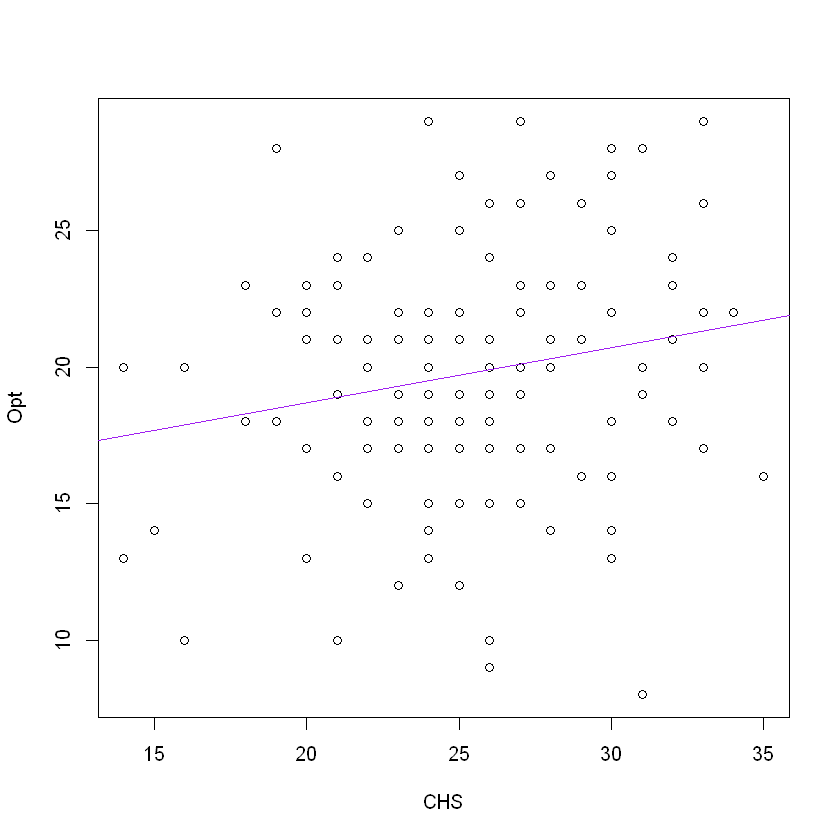

In [16]:
mod2 <- lm(Opt ~ CHS, data = pers)
plot(Opt ~ CHS, data = pers)
abline(mod2, col = 'purple')

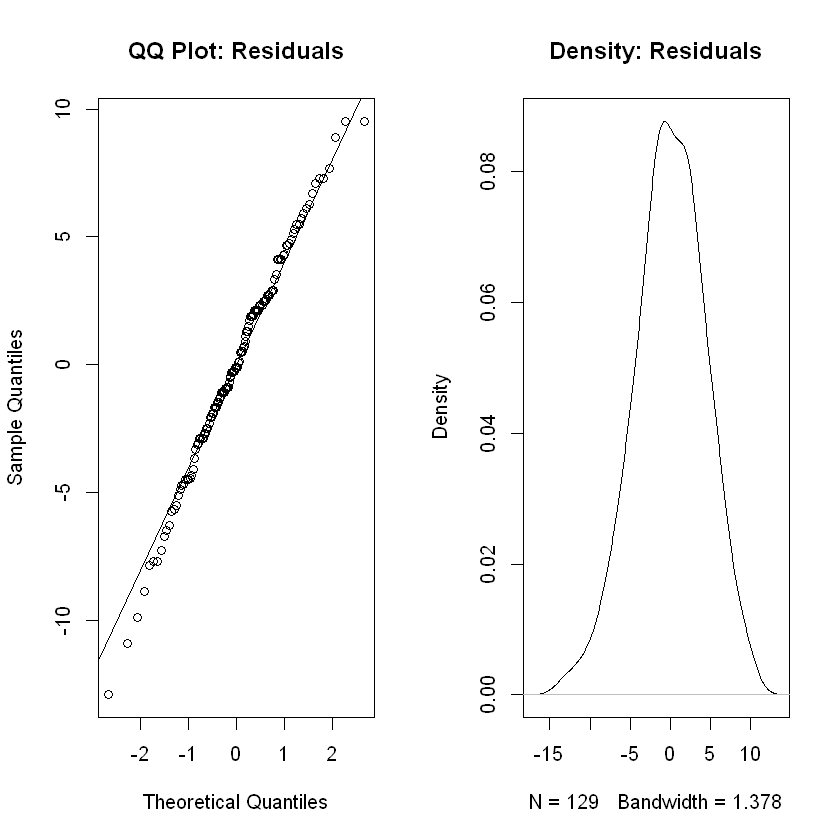

In [20]:
layout(matrix(c(1,2), ncol = 2), lcm(9))
plt <- { qqnorm(mod2$residuals, main = 'QQ Plot: Residuals') ; qqline(mod2$residuals) }
plot(density(mod2$residuals), main = 'Density: Residuals')

Assumptions check out -- these data are appropriate for regression techniques.

In [22]:
cat('r =', cor(pers$Opt,pers$CHS))
summary(mod2)

r = 0.2090047


Call:
lm(formula = Opt ~ CHS, data = pers)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.9196  -2.7164  -0.1068   2.7061   9.5190 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.61998    2.15553   6.783 4.01e-10 ***
CHS          0.20321    0.08437   2.409   0.0175 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.361 on 127 degrees of freedom
Multiple R-squared:  0.04368,	Adjusted R-squared:  0.03615 
F-statistic: 5.801 on 1 and 127 DF,  p-value: 0.01745


Because $p = 0.0175 < 0.05 =\alpha$, we reject the null. We have evidence for a significant correlation (r = 0.209). The correlation is weak and positive. With $R^2 = 0.0437$, we see that 4.4% of the variance in Coping Humor (CHS) is accounted for by Optimism (Opt).

## Example 3

In the World Health Organization Life Expectancy data set, test for a linear relationship between the GDP of a country and the life expectancy of its citizens.

In [23]:
# Load data. Create model.
life <- read.csv('https://faculty.ung.edu/rsinn/data/lifeexpectancy.csv')
life15 = subset(life, Year == 2015)
head(life15)

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV.AIDS,GDP,Population,Thinness_.1.19_years,Thinness_5.9_years,Income,SchoolingYrs
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.27962,65,1154,...,6,8.16,65,0.1,584.2592,33736494,17.2,17.3,0.479,10.1
17,Albania,2015,Developing,77.8,74,0,4.60,364.97523,99,0,...,99,6.00,99,0.1,3954.2278,28873,1.2,1.3,0.762,14.2
33,Algeria,2015,Developing,75.6,19,21,NA,0.00000,95,63,...,95,NA,95,0.1,4132.7629,39871528,6.0,5.8,0.743,14.4
49,Angola,2015,Developing,52.4,335,66,NA,0.00000,64,118,...,7,NA,64,1.9,3695.7937,2785935,8.3,8.2,0.531,11.4
65,Antigua and Barbuda,2015,Developing,76.4,13,0,NA,0.00000,99,0,...,86,NA,99,0.2,13566.9541,NA,3.3,3.3,0.784,13.9
81,Argentina,2015,Developing,76.3,116,8,NA,0.00000,94,0,...,93,NA,94,0.1,13467.1236,43417765,1.0,0.9,0.826,17.3


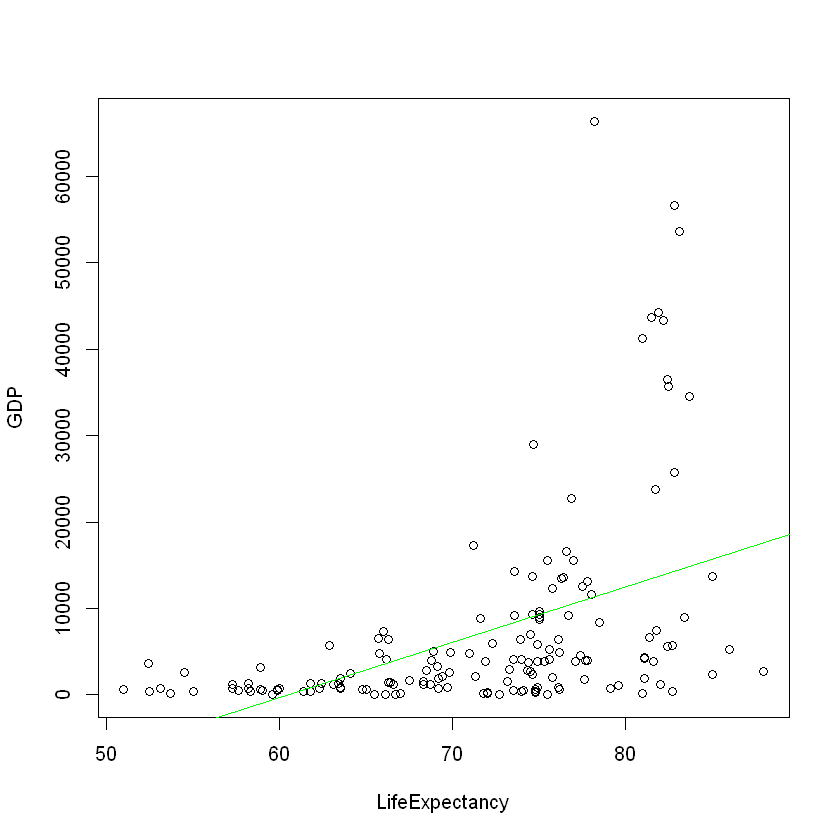

In [24]:
mod3 <- lm(GDP ~ LifeExpectancy, data = life15)
plot(GDP ~ LifeExpectancy, data = life15)
abline(mod3, col = 'green')

No evidence of a linear relationship, so data are not appropriate for linear regression techniques.

## Example 4

In the World Health Organization Life Expectancy data set, test for a linear relationship between the average **Alcohol Consumption** of a country and the **life expectancy** of its citizens.

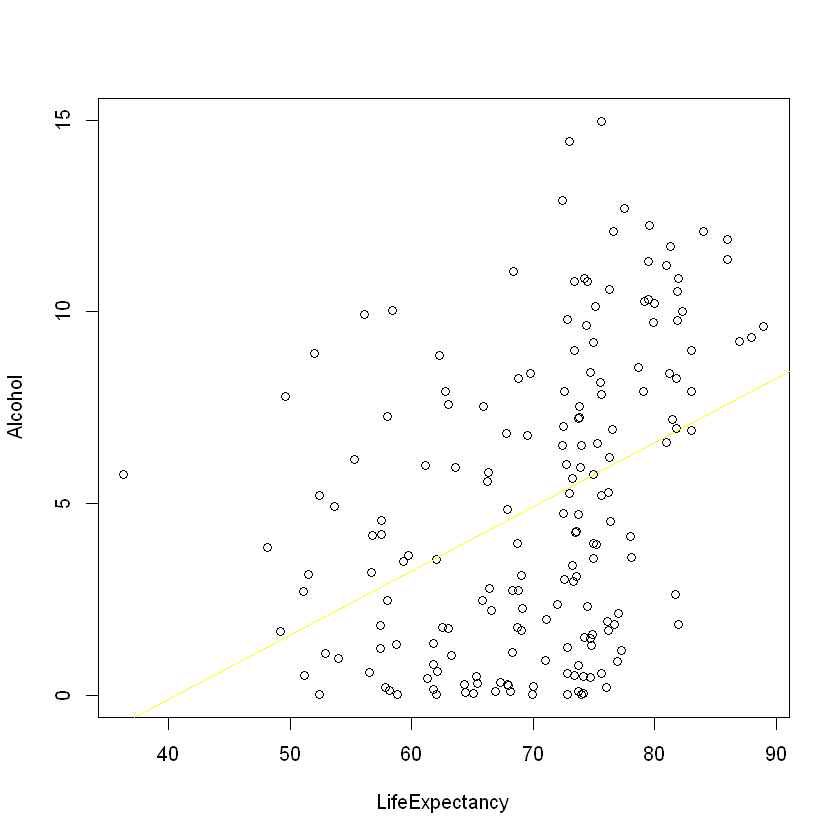

In [26]:
life10 <- subset(life, Year == 2010)
mod4 <- lm(Alcohol ~ LifeExpectancy, data = life10)
plot(Alcohol ~ LifeExpectancy, data = life10)
abline(mod4, col = 'yellow')

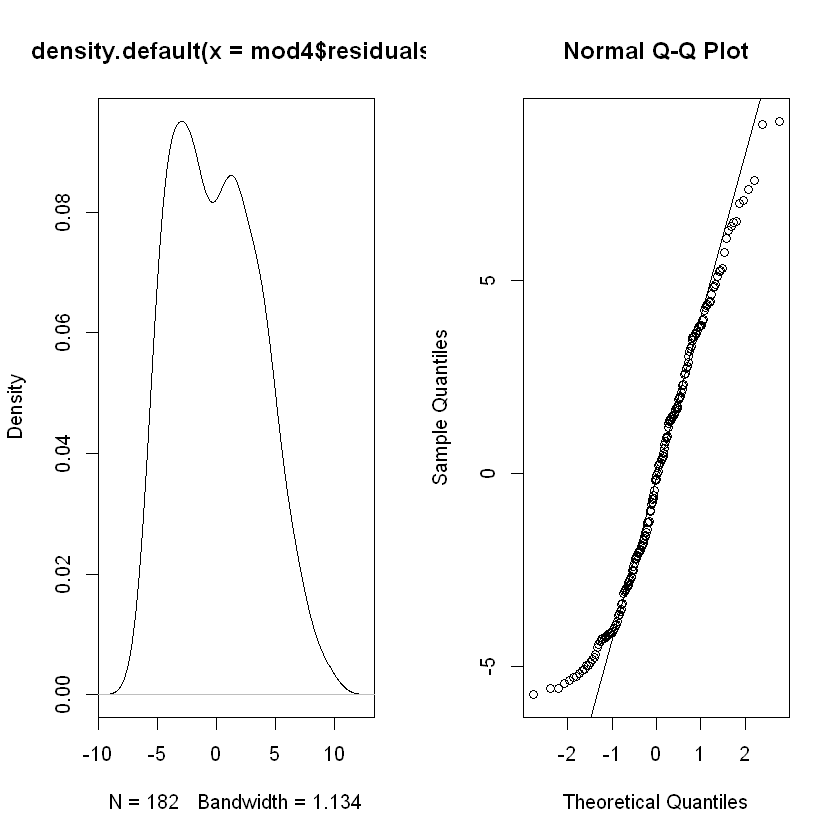

In [28]:
mod4 <- lm(Alcohol ~ LifeExpectancy, data = life10)
layout(matrix(c(1,2), ncol = 2), lcm(9))
plot(density(mod4$residuals))
plt4 <- { qqnorm(mod4$residuals) ; qqline(mod4$residuals) }

In [29]:
cor(life10$Alcohol, life10$LifeExpectancy)
mod4 <- lm(Alcohol ~ LifeExpectancy, data = life10)
summary(mod4)

[1] NA


Call:
lm(formula = Alcohol ~ LifeExpectancy, data = life10)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7360 -2.9779 -0.1081  2.6723  9.1109 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -6.79620    2.03072  -3.347 0.000996 ***
LifeExpectancy  0.16740    0.02871   5.831  2.5e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.577 on 180 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1589,	Adjusted R-squared:  0.1542 
F-statistic:    34 on 1 and 180 DF,  p-value: 2.503e-08
